In [625]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import csv
plt.style.use('fivethirtyeight')

In [626]:
# importing the data
df = yf.download("INFY.NS", start="2016-08-01", end="2019-07-31")

[*********************100%***********************]  1 of 1 completed


In [627]:
df['Date'] = df.index
df= df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Open,High,Low,Close,Adj Close,Volume,Date
2016-08-01,535.750000,543.924988,534.174988,542.625000,473.682190,9096662,2016-08-01
2016-08-02,539.950012,542.500000,537.500000,541.900024,473.049316,6822502,2016-08-02
2016-08-03,542.825012,543.250000,535.150024,542.450012,473.529510,7213460,2016-08-03
2016-08-04,543.200012,543.450012,535.025024,535.900024,467.811676,4237278,2016-08-04
2016-08-05,536.000000,536.724976,530.000000,534.000000,466.153015,5609968,2016-08-05
...,...,...,...,...,...,...,...
2019-07-24,788.000000,793.750000,783.599976,786.299988,742.050415,5745146,2019-07-24
2019-07-25,788.250000,800.200012,787.650024,794.500000,749.788940,9773568,2019-07-25
2019-07-26,792.299988,795.000000,782.200012,787.000000,742.710999,4941763,2019-07-26
2019-07-29,789.500000,796.950012,786.200012,791.450012,746.910645,6244316,2019-07-29


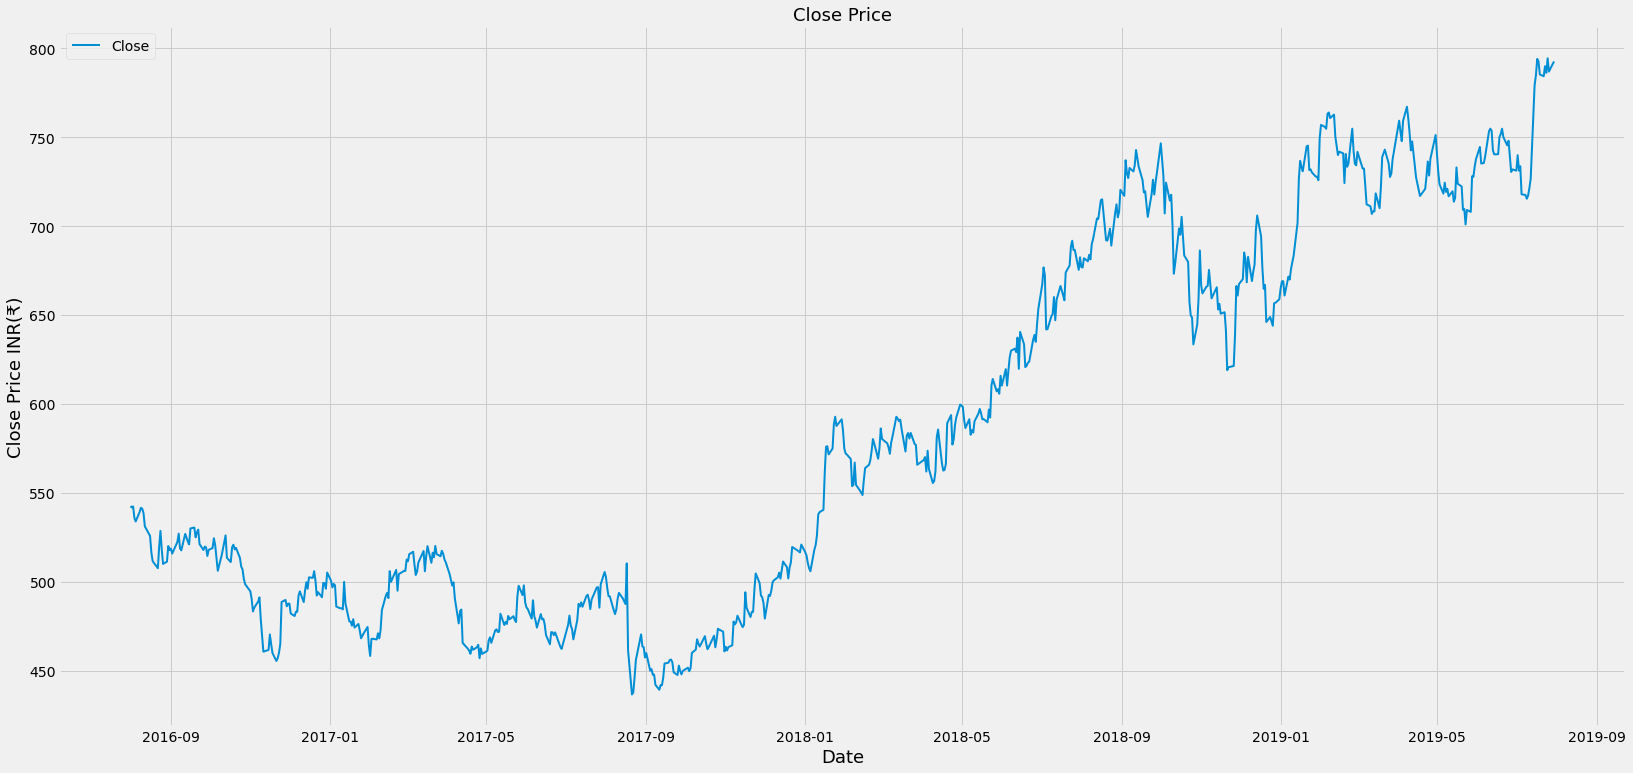

In [628]:
# Visualizing the data
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(df['Close'], label= 'Close',linewidth=2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Two Moving Averages

In [629]:
# Creating new dataset
data = pd.DataFrame()
data['Date'] = df['Date']
data['Close'] = df['Close']
data['ShortMA'] = df['Close'].rolling(window=15).mean()
data['LongMA'] = df['Close'].rolling(window=89).mean()
data

,Date,Close,ShortMA,LongMA
2016-08-01,2016-08-01,542.625000,NaN,NaN
2016-08-02,2016-08-02,541.900024,NaN,NaN
2016-08-03,2016-08-03,542.450012,NaN,NaN
2016-08-04,2016-08-04,535.900024,NaN,NaN
2016-08-05,2016-08-05,534.000000,NaN,NaN
...,...,...,...,...
2019-07-24,2019-07-24,786.299988,756.506665,737.528649
2019-07-25,2019-07-25,794.500000,760.553333,738.495503
2019-07-26,2019-07-26,787.000000,765.153333,739.379211
2019-07-29,2019-07-29,791.450012,770.076668,740.198312


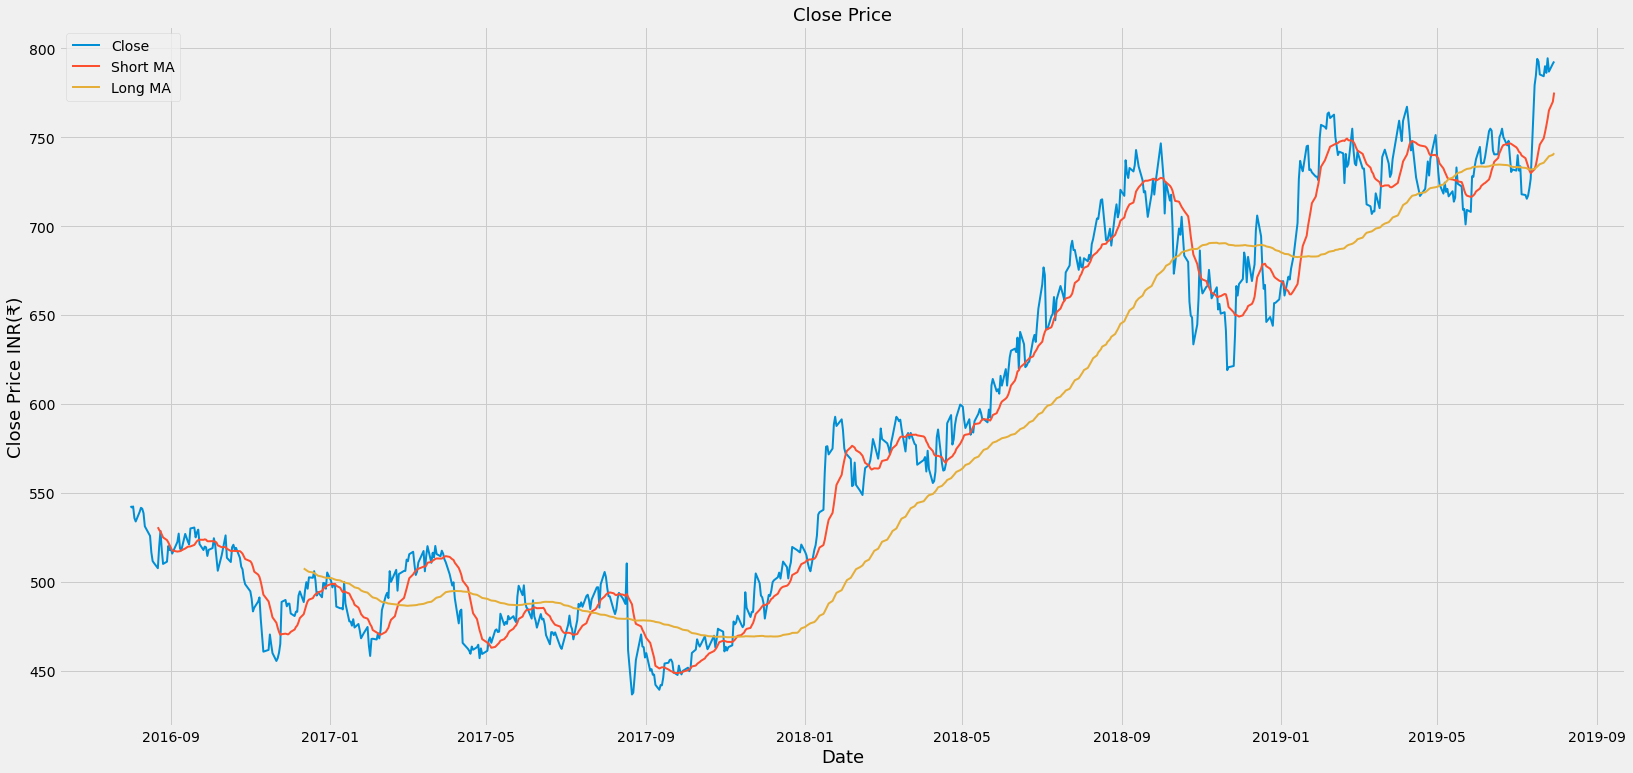

In [630]:
# Plotting all data 
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(data['Close'], label= 'Close', lw=2.0)
plt.plot(data['ShortMA'], label = 'Short MA', lw = 2.0)
plt.plot(data['LongMA'], label = 'Long MA', lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [631]:
# function to determine buy sell signal price using SMA15 and SMA89
def buy_sell_sma(data):
    sigPriceBuy= []
    sigPriceSell= []
    position = []
    
    for i in range(len(data)):
        if data['ShortMA'][i] > data['LongMA'][i]: #then buy
            sigPriceBuy.append(data['Close'][i])
            sigPriceSell.append(np.nan)
            position.append(0)
                
        elif data['ShortMA'][i] < data['LongMA'][i]: #then sell
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(data['Close'][i])
            position.append(1)
                
        else:
            sigPriceBuy.append(np.nan)
            sigPriceSell.append(np.nan)
            position.append(-1)

    return(sigPriceBuy,sigPriceSell,position)

In [632]:
buy_sell = buy_sell_sma(data)
data['Buy_Signal_Price']= buy_sell[0]
data['Sell_Signal_Price']=buy_sell[1]
data['Position']=buy_sell[2]

data


,Date,Close,ShortMA,LongMA,Buy_Signal_Price,Sell_Signal_Price,Position
2016-08-01,2016-08-01,542.625000,NaN,NaN,NaN,NaN,-1
2016-08-02,2016-08-02,541.900024,NaN,NaN,NaN,NaN,-1
2016-08-03,2016-08-03,542.450012,NaN,NaN,NaN,NaN,-1
2016-08-04,2016-08-04,535.900024,NaN,NaN,NaN,NaN,-1
2016-08-05,2016-08-05,534.000000,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...
2019-07-24,2019-07-24,786.299988,756.506665,737.528649,786.299988,NaN,0
2019-07-25,2019-07-25,794.500000,760.553333,738.495503,794.500000,NaN,0
2019-07-26,2019-07-26,787.000000,765.153333,739.379211,787.000000,NaN,0
2019-07-29,2019-07-29,791.450012,770.076668,740.198312,791.450012,NaN,0


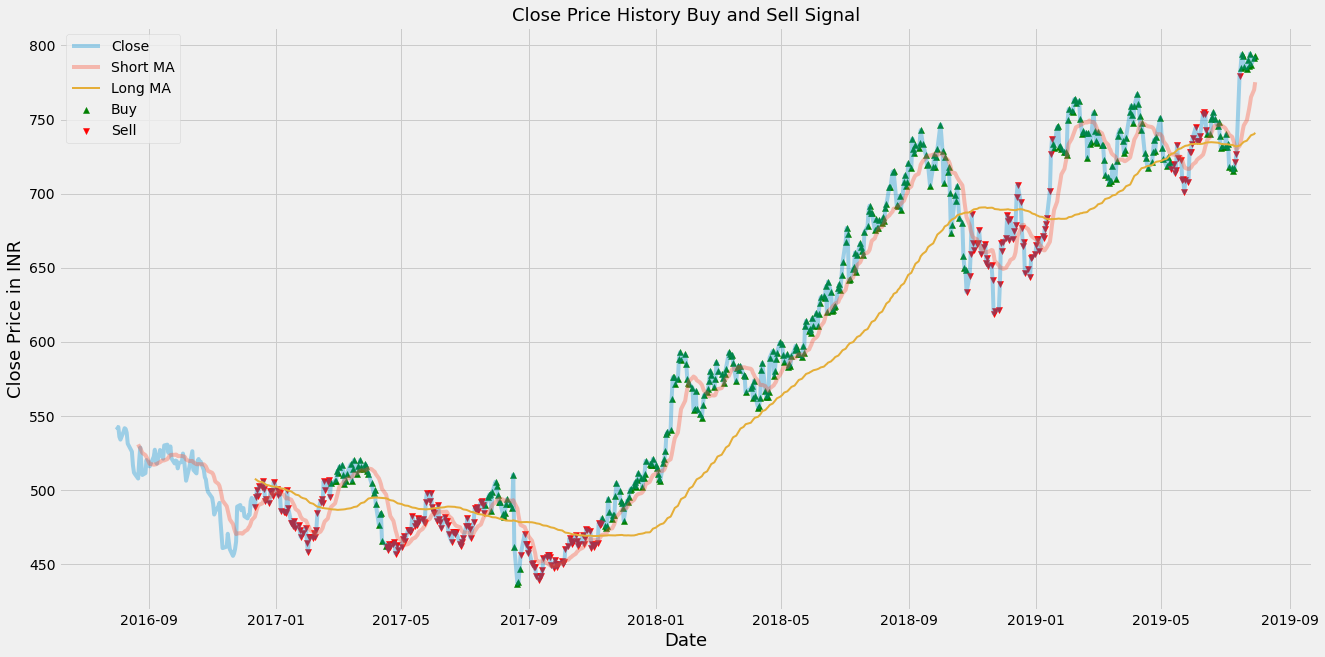

In [633]:
# plotting the buy-sell signals on the graph
plt.figure(figsize=(20,10))
plt.title('Close Price History Buy and Sell Signal', fontsize=18)
plt.plot(data['Close'], label= 'Close', alpha= 0.35)
plt.plot(data['ShortMA'], label= 'Short MA', alpha= 0.35)
plt.plot(data['LongMA'], label = 'Long MA', lw = 2.0)
plt.scatter(data.index, data['Buy_Signal_Price'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.legend(loc='upper left')
plt.show()

# Bollinger Bands

In [634]:
# Creating new dataset
data2 = pd.DataFrame()
data2['Close'] = df['Close']

# Let the time period be 20
period = 20

# Calculate Simple Moving Average
data2['SMA'] = df['Close'].rolling(window=period).mean()

# Calculate Standard Deviation
data2['Std'] = df['Close'].rolling(window=period).std()

# Calculate the Upper Bollinger Band
data2['Upper'] = data2['SMA'] + 2*data2['Std']

# Calculate the Lower Bollinger Band
data2['Lower'] = data2['SMA'] - 2*data2['Std']

In [635]:
data2

,Close,SMA,Std,Upper,Lower
2016-08-01,542.625000,NaN,NaN,NaN,NaN
2016-08-02,541.900024,NaN,NaN,NaN,NaN
2016-08-03,542.450012,NaN,NaN,NaN,NaN
2016-08-04,535.900024,NaN,NaN,NaN,NaN
2016-08-05,534.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2019-07-24,786.299988,750.637497,31.331886,813.301269,687.973725
2019-07-25,794.500000,753.834998,32.418307,818.671611,688.998384
2019-07-26,787.000000,756.584998,32.799138,822.183274,690.986722
2019-07-29,791.450012,759.592499,33.114810,825.822118,693.362879


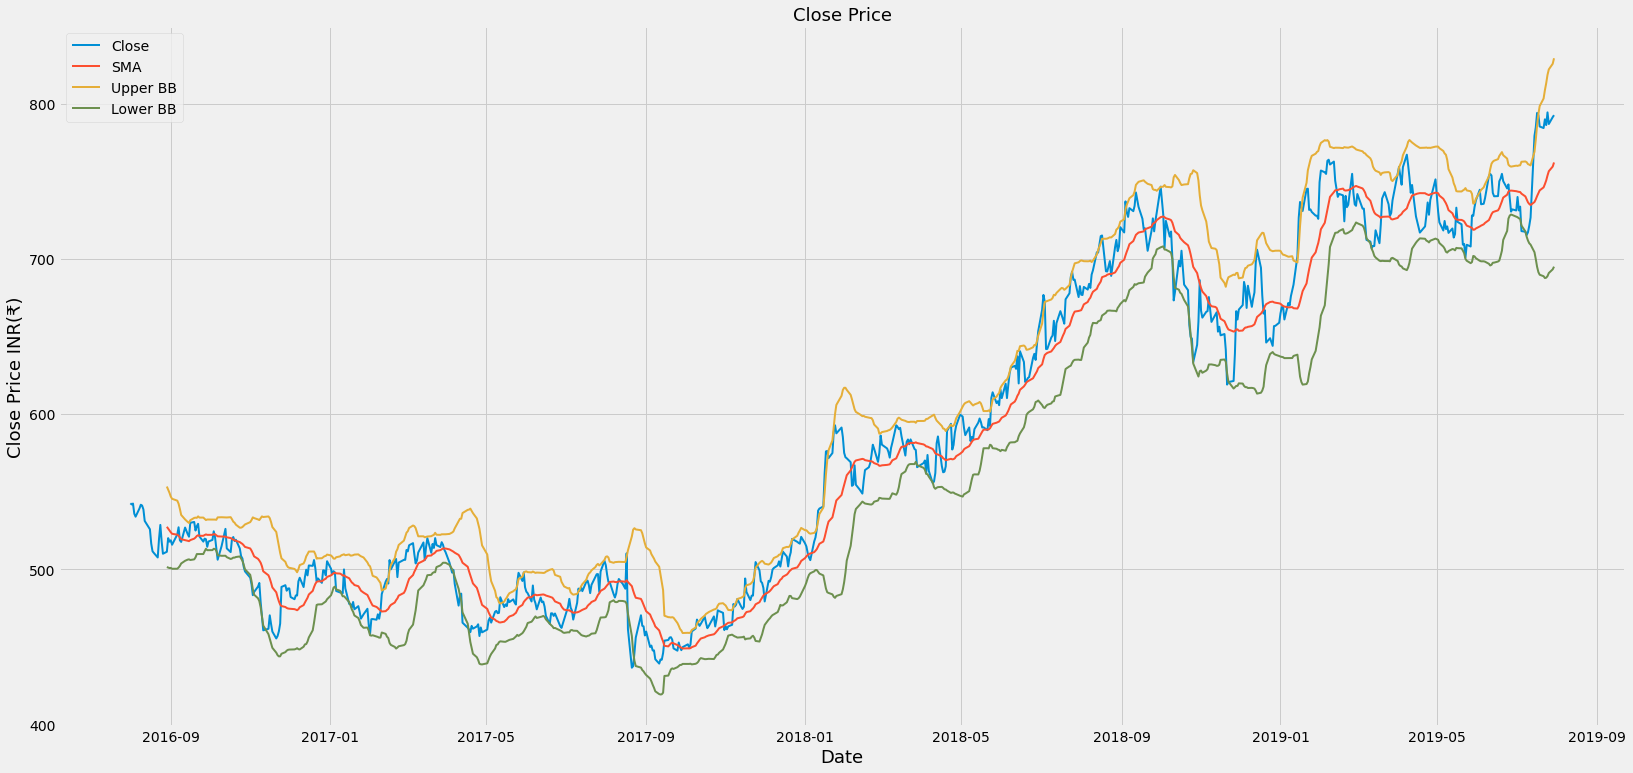

In [636]:
# Plotting all data 
plt.figure(figsize=(25,12))
plt.title('Close Price', fontsize=18)
plt.plot(data2['Close'], label= 'Close', lw=2.0)
plt.plot(data2['SMA'], label = 'SMA', lw = 2.0)
plt.plot(data2['Upper'], label = 'Upper BB', lw = 2.0)
plt.plot(data2['Lower'], label = 'Lower BB', lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR(₹)', fontsize=18)
plt.legend(loc='upper left')
plt.show()

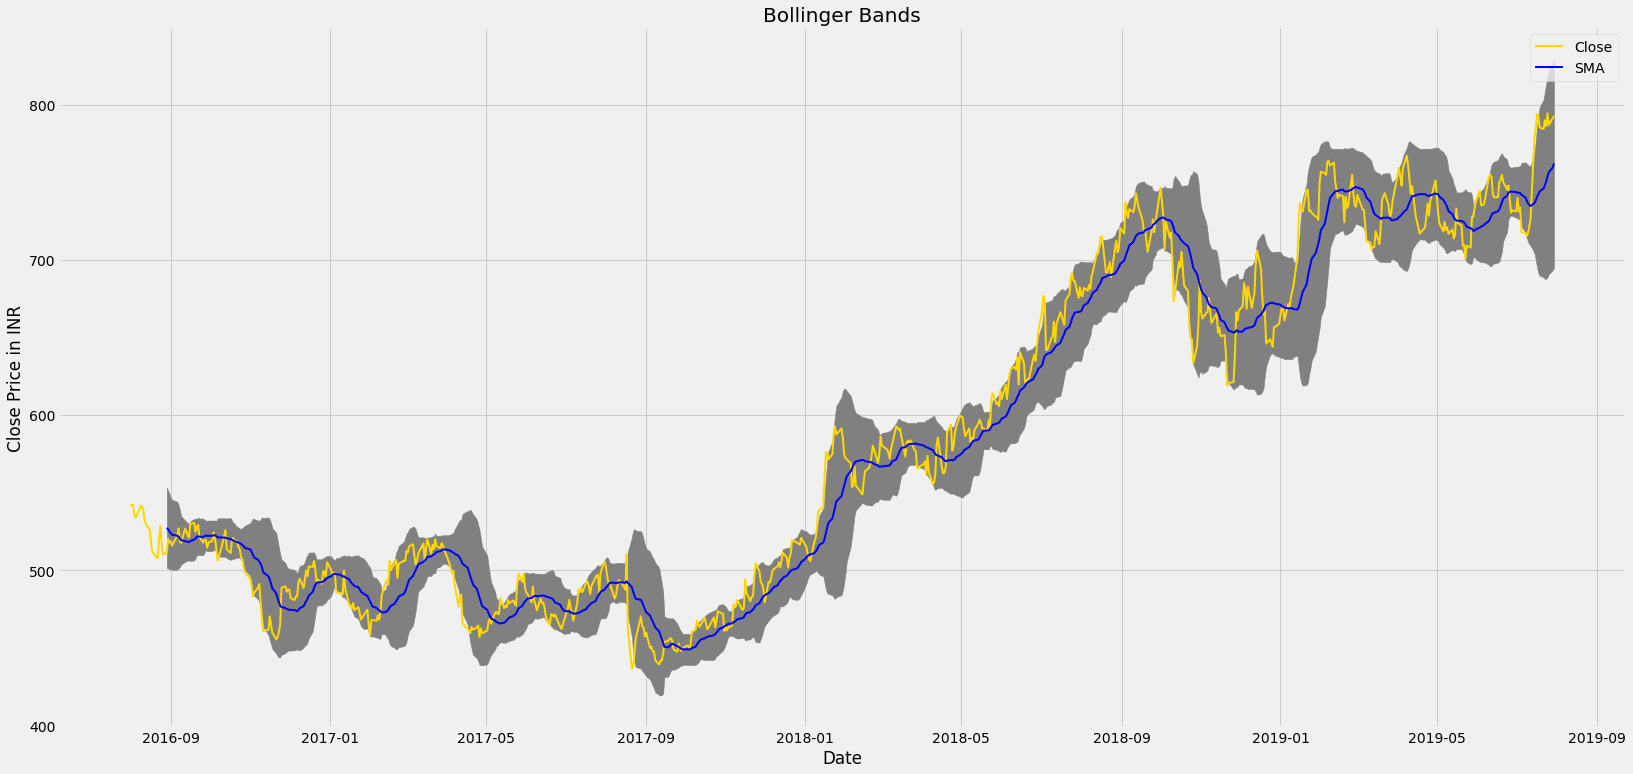

In [637]:
# Shade the Bollinger Bands
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(1,1,1)
x_axis = data2.index
ax.fill_between(x_axis, data2['Upper'], data2['Lower'], color = 'grey')
ax.plot(x_axis, data2['Close'], color= 'gold', lw=2.0, label= 'Close')
ax.plot(x_axis, data2['SMA'], color= 'Blue', lw=2.0, label= 'SMA')
ax.set_title('Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price in INR')
ax.legend()
plt.show()

In [638]:
def buy_sell_bb(data):
    buy_signal = []
    sell_signal = []
    position = []

    for i in range (len(data)):
        if data['Close'][i] > data['Upper'][i]:    # Then sell
            buy_signal.append(np.nan)
            sell_signal.append(data2['Close'][i])
            position.append(1)
        elif data['Close'][i] < data['Lower'][i]:    # Then buy
            buy_signal.append(data2['Close'][i])
            sell_signal.append(np.nan)
            position.append(0)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            position.append(-1)

    return(buy_signal, sell_signal, position)

In [639]:
buy_sell_signal = buy_sell_bb(data2)
data2['Buy_Signal_Price'] = buy_sell_signal[0]
data2['Sell_Signal_Price'] = buy_sell_signal[1]
data2['Position'] = buy_sell_signal[2]

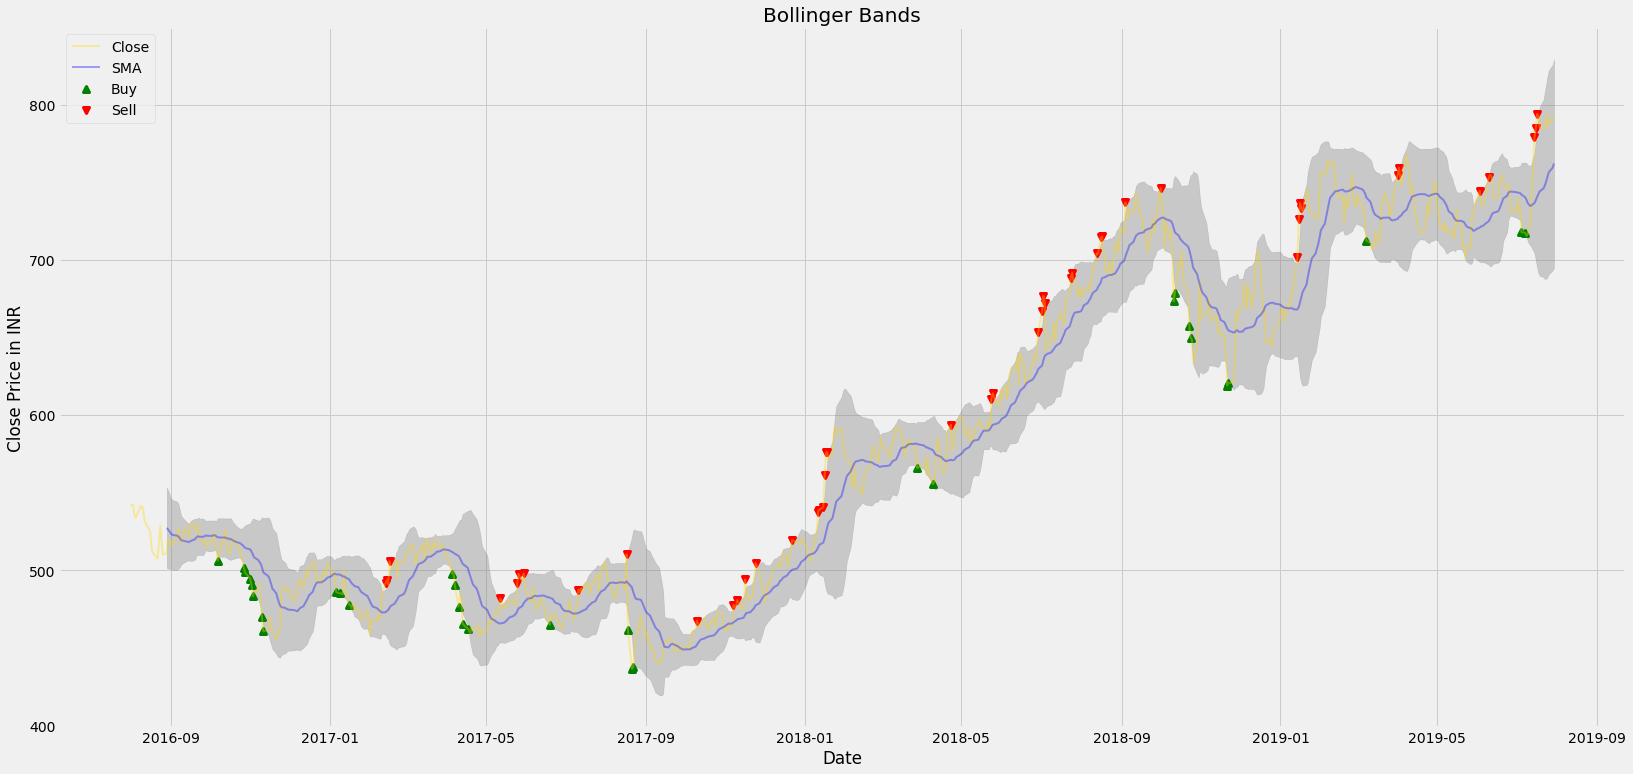

In [640]:
# Plot the buy sell signals
fig = plt.figure(figsize=(25,12))
ax = fig.add_subplot(1,1,1)
x_axis = data2.index
ax.fill_between(x_axis, data2['Upper'], data2['Lower'], color = 'grey', alpha=0.35)
ax.plot(x_axis, data2['Close'], color= 'gold', lw=2.0, label= 'Close', alpha=0.35)
ax.plot(x_axis, data2['SMA'], color= 'Blue', lw=2.0, label= 'SMA', alpha=0.35)
ax.scatter(x_axis, data2['Buy_Signal_Price'], color= 'green', lw= 3.0, label ="Buy", marker = '^')
ax.scatter(x_axis, data2['Sell_Signal_Price'], color= 'red', lw= 3.0, label ="Sell", marker = 'v')
ax.set_title('Bollinger Bands')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price in INR')
ax.legend()
plt.show()

# Combining the strategies : SMA and Bollinger Bands

In [641]:
# Creating the final data frame
dframe = pd.DataFrame()
dframe['Date'] = df['Date']
dframe['Close'] = df['Close']
dframe['ShortMA'] = data['ShortMA']
dframe['LongMA'] = data['LongMA']
dframe['SMA'] = data2['SMA']
dframe['Upper'] = data2['Upper']
dframe['Lower'] = data2['Lower']

dframe

,Date,Close,ShortMA,LongMA,SMA,Upper,Lower
2016-08-01,2016-08-01,542.625000,NaN,NaN,NaN,NaN,NaN
2016-08-02,2016-08-02,541.900024,NaN,NaN,NaN,NaN,NaN
2016-08-03,2016-08-03,542.450012,NaN,NaN,NaN,NaN,NaN
2016-08-04,2016-08-04,535.900024,NaN,NaN,NaN,NaN,NaN
2016-08-05,2016-08-05,534.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-07-24,2019-07-24,786.299988,756.506665,737.528649,750.637497,813.301269,687.973725
2019-07-25,2019-07-25,794.500000,760.553333,738.495503,753.834998,818.671611,688.998384
2019-07-26,2019-07-26,787.000000,765.153333,739.379211,756.584998,822.183274,690.986722
2019-07-29,2019-07-29,791.450012,770.076668,740.198312,759.592499,825.822118,693.362879


In [642]:
# Buy sell signal generator function
def buy_sell_signal(data):

    buy_signal = []
    sell_signal = []
    position = []

    for i in range (len(data)):

        if data['Close'][i] < data['Lower'][i] and data['ShortMA'][i] > data['LongMA'][i]: #then buy
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            position.append(0)
        elif data['Close'][i] > data['Upper'][i] and data['ShortMA'][i] < data['LongMA'][i]: #then sell
            sell_signal.append(data['Close'][i])
            buy_signal.append(np.nan)
            position.append(1)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            position.append(-1)

    return(buy_signal,sell_signal,position)


In [643]:
buy_sell = buy_sell_signal(dframe)
dframe['Buy_Signal'] = buy_sell[0]
dframe['Sell_Signal'] = buy_sell[1]
dframe['Position'] = buy_sell[2]

In [644]:
dframe

,Date,Close,ShortMA,LongMA,SMA,Upper,Lower,Buy_Signal,Sell_Signal,Position
2016-08-01,2016-08-01,542.625000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2016-08-02,2016-08-02,541.900024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2016-08-03,2016-08-03,542.450012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2016-08-04,2016-08-04,535.900024,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2016-08-05,2016-08-05,534.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...,...
2019-07-24,2019-07-24,786.299988,756.506665,737.528649,750.637497,813.301269,687.973725,NaN,NaN,-1
2019-07-25,2019-07-25,794.500000,760.553333,738.495503,753.834998,818.671611,688.998384,NaN,NaN,-1
2019-07-26,2019-07-26,787.000000,765.153333,739.379211,756.584998,822.183274,690.986722,NaN,NaN,-1
2019-07-29,2019-07-29,791.450012,770.076668,740.198312,759.592499,825.822118,693.362879,NaN,NaN,-1


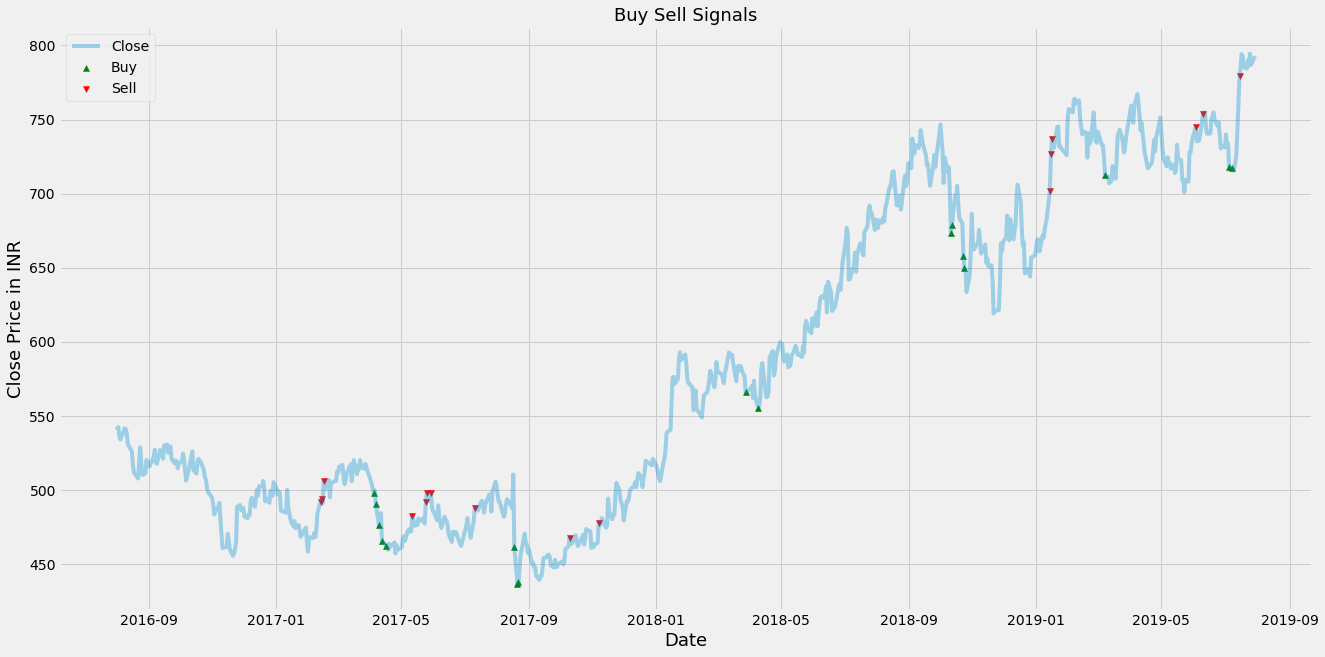

In [645]:
# Plotting the buy sell signals
plt.figure(figsize=(20,10))
plt.title('Buy Sell Signals', fontsize=18)
plt.plot(dframe['Close'], label= 'Close', alpha= 0.35)
plt.scatter(dframe.index, dframe['Buy_Signal'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(dframe.index, dframe['Sell_Signal'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in INR', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [646]:
# Writing the buy sell signals in a file

f = open('Training.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Position', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (len(dframe)):
    if dframe['Position'][i] != -1:
        row= [dframe['Date'][i], dframe['Buy_Signal'][i], dframe['Sell_Signal'][i], dframe['Position'][i]]
        writer.writerow(row)
f.close()

## Position Management

In [647]:
# Given that initial capital = 100000
init_capital = 100000
capital = init_capital


In [648]:
# importing the buy sell signals
sigData= pd.read_csv(r'Training.csv')
sigData= sigData.set_index(pd.DatetimeIndex(sigData['Date'].values))
sigData

,Date,Buy,Sell,Position,Stocks Bought,Sell Price,Return%
2017-02-13,2017-02-13 00:00:00,NaN,492.174988,1,NaN,NaN,NaN
2017-02-14,2017-02-14 00:00:00,NaN,493.850006,1,NaN,NaN,NaN
2017-02-16,2017-02-16 00:00:00,NaN,506.049988,1,NaN,NaN,NaN
2017-04-05,2017-04-05 00:00:00,497.975006,NaN,0,NaN,NaN,NaN
2017-04-07,2017-04-07 00:00:00,490.774994,NaN,0,NaN,NaN,NaN
2017-04-10,2017-04-10 00:00:00,476.700012,NaN,0,NaN,NaN,NaN
2017-04-13,2017-04-13 00:00:00,465.700012,NaN,0,NaN,NaN,NaN
2017-04-17,2017-04-17 00:00:00,462.450012,NaN,0,NaN,NaN,NaN
2017-05-12,2017-05-12 00:00:00,NaN,482.125000,1,NaN,NaN,NaN
2017-05-25,2017-05-25 00:00:00,NaN,491.649994,1,NaN,NaN,NaN


In [649]:
stocks = 0
stop_loss = capital * 95/100
position = 0
buy_signal = 0
buy_trans = 0
sell_signal = 0
sell_trans = 0

for i in range (len(sigData)):
    if not np.isnan(sigData['Buy'][i]):
        buy_signal = buy_signal + 1

        if sigData['Position'][i] == position:
            buy_trans = buy_trans + 1
            stocks = np.int(capital/sigData['Buy'][i] * 99/100)
            sigData['Stocks Bought'][i] = stocks
            position = 1

    elif not np.isnan(sigData['Sell'][i]):
        sell_signal = sell_signal +1

        if sigData['Position'][i] == position:
            sell_trans = sell_trans + 1
            capital = stocks * sigData['Sell'][i] * 99/100
            # putting stop loss
            if capital < stop_loss:
                continue
            sigData['Sell Price'][i] = capital
            position = 0
            returnPercent = (capital - init_capital)/init_capital * 100
            sigData['Return%'][i] = returnPercent

/tmp/ipykernel_7023/3808429899.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stocks = np.int(capital/sigData['Buy'][i] * 99/100)
/tmp/ipykernel_7023/3808429899.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Stocks Bought'][i] = stocks
/tmp/ipykernel_7023/3808429899.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [650]:
sigData

,Date,Buy,Sell,Position,Stocks Bought,Sell Price,Return%
2017-02-13,2017-02-13 00:00:00,NaN,492.174988,1,NaN,NaN,NaN
2017-02-14,2017-02-14 00:00:00,NaN,493.850006,1,NaN,NaN,NaN
2017-02-16,2017-02-16 00:00:00,NaN,506.049988,1,NaN,NaN,NaN
2017-04-05,2017-04-05 00:00:00,497.975006,NaN,0,198.0,NaN,NaN
2017-04-07,2017-04-07 00:00:00,490.774994,NaN,0,NaN,NaN,NaN
2017-04-10,2017-04-10 00:00:00,476.700012,NaN,0,NaN,NaN,NaN
2017-04-13,2017-04-13 00:00:00,465.700012,NaN,0,NaN,NaN,NaN
2017-04-17,2017-04-17 00:00:00,462.450012,NaN,0,NaN,NaN,NaN
2017-05-12,2017-05-12 00:00:00,NaN,482.125000,1,NaN,NaN,NaN
2017-05-25,2017-05-25 00:00:00,NaN,491.649994,1,NaN,96373.231804,-3.626768


In [651]:
# Write in Output file

f = open('Training.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (0, len(sigData)):
    if ((not np.isnan(sigData['Buy'][i])) or (not np.isnan(sigData['Sell'][i]))) and ((not np.isnan(sigData['Stocks Bought'][i])) or (not np.isnan(sigData['Sell Price'][i]))):
        row= [sigData['Date'][i], sigData['Buy'][i], sigData['Sell'][i], sigData['Stocks Bought'][i], sigData['Sell Price'][i], sigData['Return%'][i]]
        writer.writerow(row)
f.close()

In [652]:
stockData= pd.read_csv(r'Training.csv')
stockData= stockData.set_index(pd.DatetimeIndex(stockData['Date'].values))
stockData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2017-04-05,2017-04-05 00:00:00,497.975006,NaN,198.0,NaN,NaN
2017-05-25,2017-05-25 00:00:00,NaN,491.649994,NaN,96373.231804,-3.626768
2017-08-18,2017-08-18 00:00:00,461.625000,NaN,206.0,NaN,NaN
2017-10-10,2017-10-10 00:00:00,NaN,467.725006,NaN,95387.837745,-4.612162
2018-03-28,2018-03-28 00:00:00,565.900024,NaN,166.0,NaN,NaN
2019-01-14,2019-01-14 00:00:00,NaN,701.900024,NaN,115350.250012,15.350250
2019-03-08,2019-03-08 00:00:00,712.349976,NaN,160.0,NaN,NaN
2019-06-03,2019-06-03 00:00:00,NaN,744.650024,NaN,117952.563867,17.952564
2019-07-05,2019-07-05 00:00:00,718.000000,NaN,162.0,NaN,NaN
2019-07-15,2019-07-15 00:00:00,NaN,779.349976,NaN,124992.149084,24.992149


In [653]:
# Calculating benchmark return

benchmark = capital * data['Close'][-1]/data['Close'][0]
benchmarkPercent = (benchmark-capital)/capital * 100

# Calculate final return Percent
returnPercent = stockData['Return%'][-1]

print('Benchmark return = ', benchmarkPercent, '%')
print('Actual Return = ', returnPercent , '%')

Benchmark return =  46.08615751338977 %
Actual Return =  24.99214908447265 %


In [654]:
# Number of Buy and Sell signals generated
print('Number of Buy Signals = ', buy_signal)
print('Number of Sell signals = ', sell_signal)

# Number of Transactions
print('Number of Buy Transactions = ', buy_trans)
print('Number of Sell transactions = ', sell_trans)

Number of Buy Signals =  17
Number of Sell signals =  16
Number of Buy Transactions =  5
Number of Sell transactions =  6


# RSI (Relative Strength Index)

In [655]:
# Prepare the data to calculate RSI

# Get the difference in Price from previous day
delta = df['Close'].diff(1)
delta = delta.dropna()
delta

2016-08-02   -0.724976
2016-08-03    0.549988
2016-08-04   -6.549988
2016-08-05   -1.900024
2016-08-08    5.349976
                ...   
2019-07-24   -3.750000
2019-07-25    8.200012
2019-07-26   -7.500000
2019-07-29    4.450012
2019-07-30    1.250000
Name: Close, Length: 738, dtype: float64

In [656]:
# Get the Positive Gain and Negative Gain
up = delta.copy()
down = delta.copy()
up[up<0] = 0
down[down > 0] = 0

In [657]:
# Time period
period = 14

# Calculate average gain and loss
avg_gain = up.rolling(window=period).mean()
avg_loss = abs(down.rolling(window=period).mean())

In [658]:
# Calculate the RS
RS = avg_gain/avg_loss

# Calculate the RSI
RSI = 100.0 - (100.0 / (1.0 + RS))

In [659]:
# Creating new Dataframe
dframe1 = pd.DataFrame()
dframe1['Date'] = df['Date']
dframe1['Close'] = df['Close']
dframe1['RSI'] = RSI
dframe1

,Date,Close,RSI
2016-08-01,2016-08-01,542.625000,NaN
2016-08-02,2016-08-02,541.900024,NaN
2016-08-03,2016-08-03,542.450012,NaN
2016-08-04,2016-08-04,535.900024,NaN
2016-08-05,2016-08-05,534.000000,NaN
...,...,...,...
2019-07-24,2019-07-24,786.299988,72.609824
2019-07-25,2019-07-25,794.500000,85.253456
2019-07-26,2019-07-26,787.000000,80.017318
2019-07-29,2019-07-29,791.450012,82.195848


In [660]:
dframe1

,Date,Close,RSI
2016-08-01,2016-08-01,542.625000,NaN
2016-08-02,2016-08-02,541.900024,NaN
2016-08-03,2016-08-03,542.450012,NaN
2016-08-04,2016-08-04,535.900024,NaN
2016-08-05,2016-08-05,534.000000,NaN
...,...,...,...
2019-07-24,2019-07-24,786.299988,72.609824
2019-07-25,2019-07-25,794.500000,85.253456
2019-07-26,2019-07-26,787.000000,80.017318
2019-07-29,2019-07-29,791.450012,82.195848


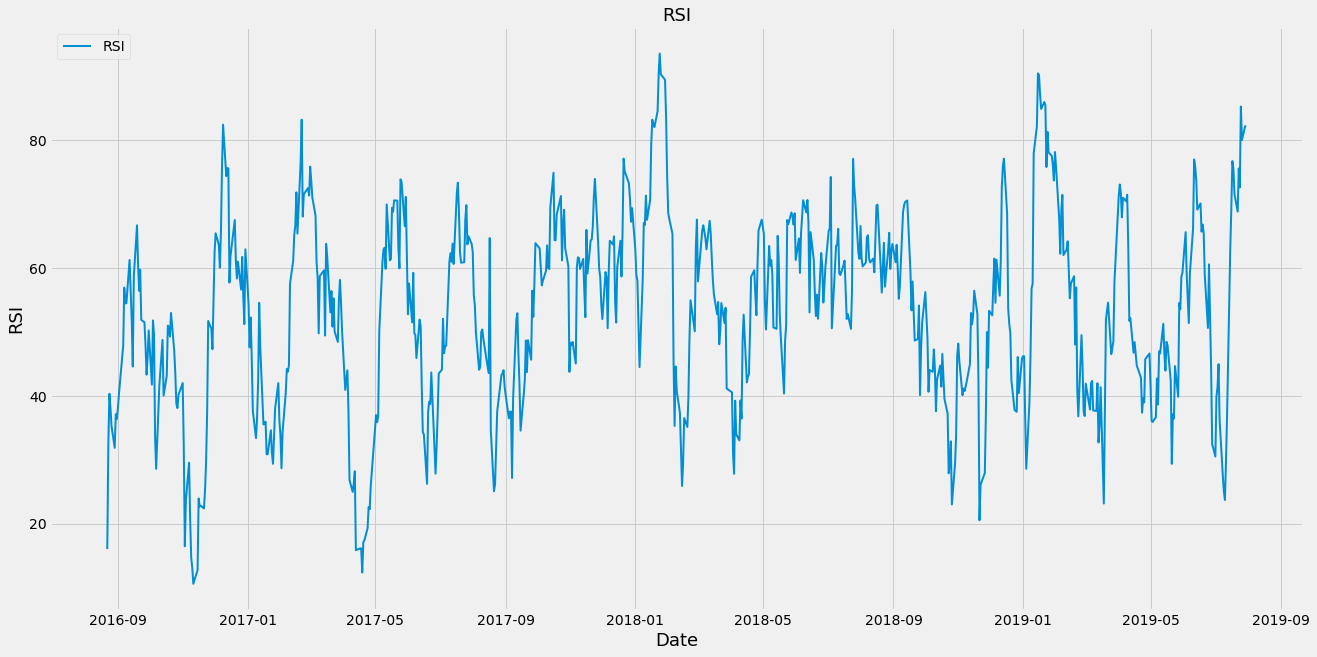

In [661]:
# Plot the data
plt.figure(figsize=(20,10))
plt.title('RSI', fontsize=18)
plt.plot(dframe1['RSI'], label = "RSI", lw = 2.0)
plt.xlabel('Date', fontsize=18)
plt.ylabel('RSI', fontsize=18)
plt.legend(loc='upper left')
plt.show()

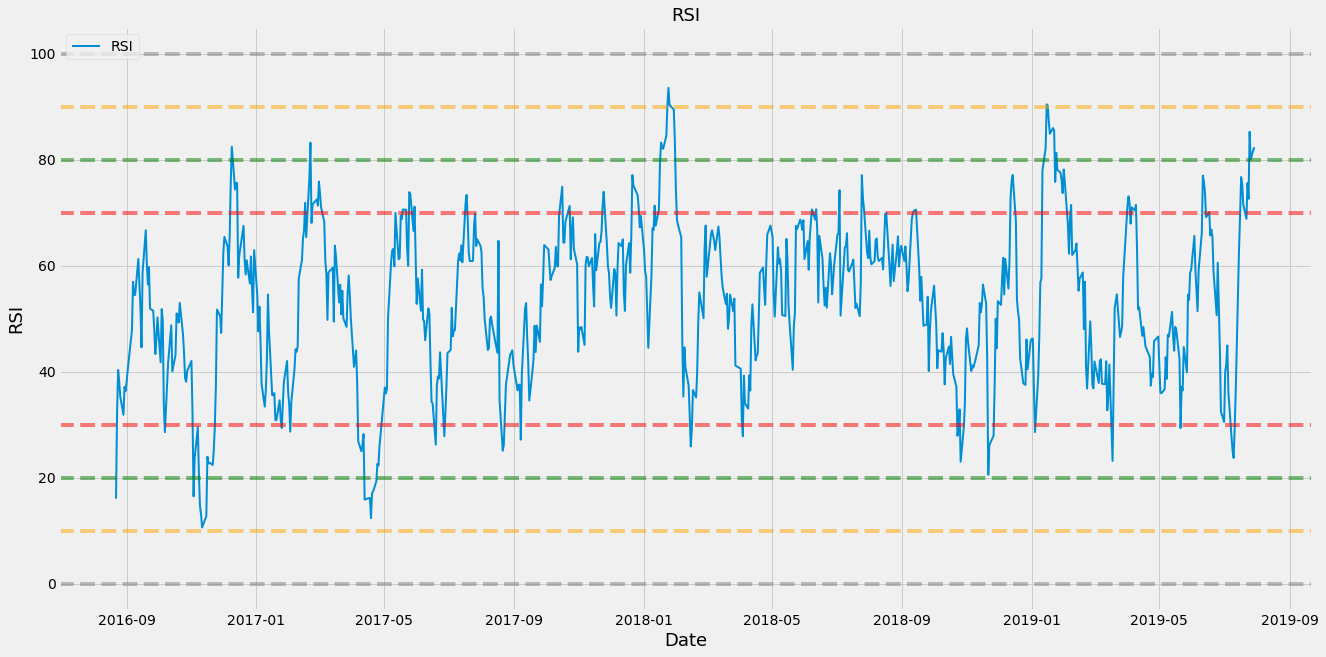

In [662]:
# Plot the RSI values and significant levels
plt.figure(figsize=(20,10))
plt.title('RSI', fontsize=18)
plt.plot(dframe1['RSI'], label = "RSI", lw = 2.0)
plt.axhline(0, linestyle = '--', alpha = 0.5, color = "grey")
plt.axhline(10, linestyle = '--', alpha = 0.5, color = "orange")
plt.axhline(20, linestyle = '--', alpha = 0.5, color = "green")
plt.axhline(30, linestyle = '--', alpha = 0.5, color = "red")
plt.axhline(70, linestyle = '--', alpha = 0.5, color = "red")
plt.axhline(80, linestyle = '--', alpha = 0.5, color = "green")
plt.axhline(90, linestyle = '--', alpha = 0.5, color = "orange")
plt.axhline(100, linestyle = '--', alpha = 0.5, color = "grey")
plt.xlabel('Date', fontsize=18)
plt.ylabel('RSI', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [663]:
def buy_sell_rsi(data):
    buy_signal = []
    sell_signal = []
    position = []
    for i in range (len(data)-1):
        if data['RSI'][i] > 70 and data['RSI'][i+1] <= 70:
            buy_signal.append(np.nan)
            sell_signal.append(data['Close'][i])
            position.append(1)
        elif data['RSI'][i]<30 and data['RSI'][i+1] >= 30:
            buy_signal.append(data['Close'][i])
            sell_signal.append(np.nan)
            position.append(0)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            position.append(-1)

    buy_signal.append(np.nan)
    sell_signal.append(np.nan)
    position.append(-1)
    return(buy_signal, sell_signal, position)


In [664]:
buy_sell_signal = buy_sell_rsi(dframe1)
dframe1['Buy_Signal'] = buy_sell_signal[0]
dframe1['Sell_Signal'] = buy_sell_signal[1]
dframe1['Position'] = buy_sell_signal[2]

In [665]:
# Writing the buy sell signals in a file

f = open('Training.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Position', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (len(dframe1)):
    if dframe1['Position'][i] != -1:
        row= [dframe1['Date'][i], dframe1['Buy_Signal'][i], dframe1['Sell_Signal'][i], dframe1['Position'][i]]
        writer.writerow(row)
f.close()

## Position Management

In [666]:
# Given that initial capital = 100000
init_capital = 100000
capital = init_capital

In [667]:
# importing the buy sell signals
sigData= pd.read_csv(r'Training.csv')
sigData= sigData.set_index(pd.DatetimeIndex(sigData['Date'].values))
sigData

,Date,Buy,Sell,Position,Stocks Bought,Sell Price,Return%
2016-08-22,2016-08-22 00:00:00,507.725006,NaN,0,NaN,NaN,NaN
2016-10-07,2016-10-07 00:00:00,506.274994,NaN,0,NaN,NaN,NaN
2016-11-23,2016-11-23 00:00:00,460.125000,NaN,0,NaN,NaN,NaN
2016-12-14,2016-12-14 00:00:00,NaN,499.875000,1,NaN,NaN,NaN
2017-01-25,2017-01-25 00:00:00,468.299988,NaN,0,NaN,NaN,NaN
2017-02-02,2017-02-02 00:00:00,467.950012,NaN,0,NaN,NaN,NaN
2017-02-16,2017-02-16 00:00:00,NaN,506.049988,1,NaN,NaN,NaN
2017-02-21,2017-02-21 00:00:00,NaN,506.799988,1,NaN,NaN,NaN
2017-03-03,2017-03-03 00:00:00,NaN,515.599976,1,NaN,NaN,NaN
2017-04-28,2017-04-28 00:00:00,459.475006,NaN,0,NaN,NaN,NaN


In [668]:
stocks = 0
stop_loss = capital * 95/100
position = 0
buy_signal = 0
buy_trans = 0
sell_signal = 0
sell_trans = 0

for i in range (len(sigData)):
    if not np.isnan(sigData['Buy'][i]):
        buy_signal = buy_signal + 1
        if sigData['Position'][i] == position:
            buy_trans = buy_trans + 1
            stocks = np.int(capital/sigData['Buy'][i] * 99/100)
            sigData['Stocks Bought'][i] = stocks
            position = 1

    elif not np.isnan(sigData['Sell'][i]):
        sell_signal = sell_signal +1

        if sigData['Position'][i] == position:
            sell_trans = sell_trans + 1
            capital = stocks * sigData['Sell'][i] * 99/100
            # putting stop loss
            if capital < stop_loss:
                continue
            sigData['Sell Price'][i] = capital
            position = 0
            returnPercent = (capital - init_capital)/init_capital * 100
            sigData['Return%'][i] = returnPercent



# Selling all stocks at the end if last signal was a buy signal
if position == 1:
    capital = stocks * df['Close'][-1] * 99/100
    sigData['Sell Price'][i-1] = capital
    returnPercent = (capital - init_capital)/init_capital * 100
    sigData['Return%'][i] = returnPercent


/tmp/ipykernel_7023/3769445167.py:14: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  stocks = np.int(capital/sigData['Buy'][i] * 99/100)
/tmp/ipykernel_7023/3769445167.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sigData['Stocks Bought'][i] = stocks
/tmp/ipykernel_7023/3769445167.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

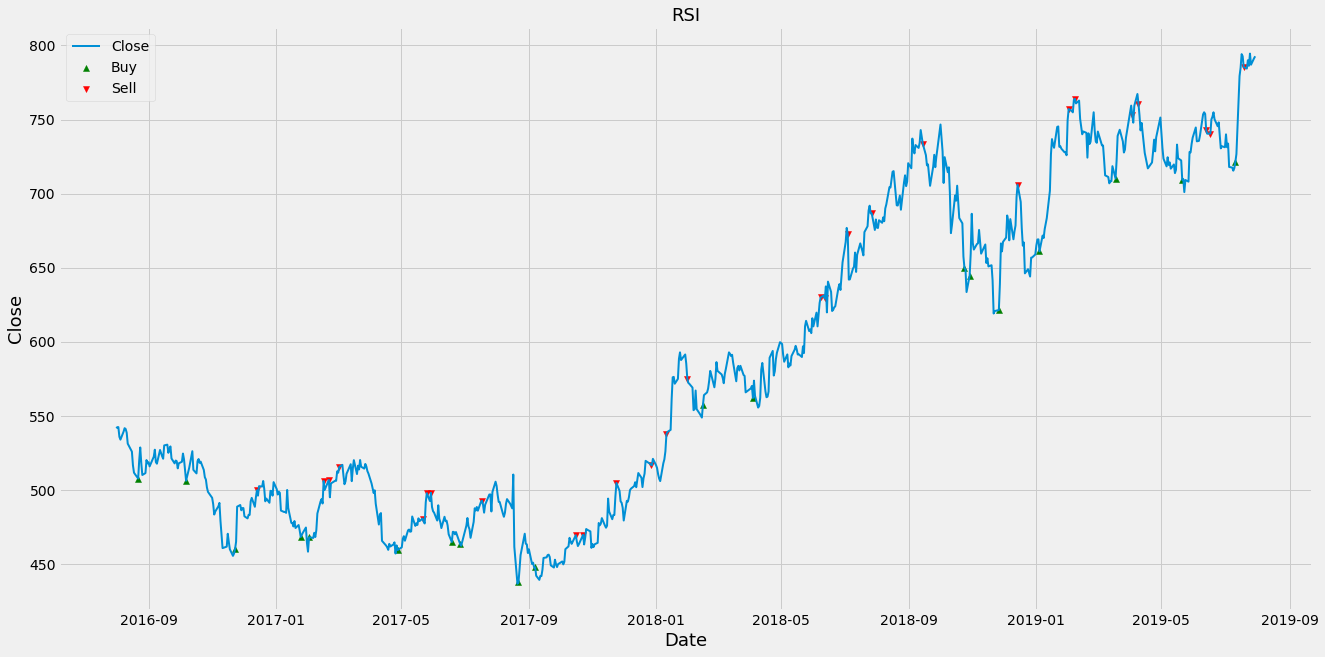

In [669]:
# Plot the buy and sell signals
plt.figure(figsize=(20,10))
plt.title('RSI', fontsize=18)
plt.plot(dframe1['Close'], label = "Close", lw = 2.0)
plt.scatter(dframe1.index, dframe1['Buy_Signal'], label= 'Buy', marker= '^', color= 'green')
plt.scatter(dframe1.index, dframe1['Sell_Signal'], label= 'Sell', marker= 'v', color= 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close', fontsize=18)
plt.legend(loc='upper left')
plt.show()

In [670]:
# Write in Output file

f = open('Training.csv','w')
writer = csv.writer(f)
row = ['Date', 'Buy', 'Sell', 'Stocks Bought', 'Sell Price', 'Return%']
writer.writerow(row)
for i in range (0, len(sigData)):
     if ((not np.isnan(sigData['Buy'][i])) or (not np.isnan(sigData['Sell'][i]))) and ((not np.isnan(sigData['Stocks Bought'][i])) or (not np.isnan(sigData['Sell Price'][i]))):
        row= [sigData['Date'][i], sigData['Buy'][i], sigData['Sell'][i], sigData['Stocks Bought'][i], sigData['Sell Price'][i], sigData['Return%'][i]]
        writer.writerow(row)
f.close()

In [676]:
stockData= pd.read_csv(r'Training.csv')
stockData= stockData.set_index(pd.DatetimeIndex(stockData['Date'].values))
stockData

,Date,Buy,Sell,Stocks Bought,Sell Price,Return%
2016-08-22,2016-08-22 00:00:00,507.725006,NaN,194.0,NaN,NaN
2016-12-14,2016-12-14 00:00:00,NaN,499.875000,NaN,96005.992500,-3.994008
2017-01-25,2017-01-25 00:00:00,468.299988,NaN,202.0,NaN,NaN
2017-02-16,2017-02-16 00:00:00,NaN,506.049988,NaN,101199.876559,1.199877
2017-04-28,2017-04-28 00:00:00,459.475006,NaN,218.0,NaN,NaN
2017-05-22,2017-05-22 00:00:00,NaN,480.725006,NaN,103750.070817,3.750071
2017-06-19,2017-06-19 00:00:00,464.924988,NaN,220.0,NaN,NaN
2017-07-18,2017-07-18 00:00:00,NaN,492.799988,NaN,107331.837341,7.331837
2017-08-22,2017-08-22 00:00:00,437.700012,NaN,242.0,NaN,NaN
2017-10-16,2017-10-16 00:00:00,NaN,469.500000,NaN,112482.810000,12.482810


In [677]:
# Calculating benchmark return

benchmark = capital * data['Close'][-1]/data['Close'][0]
benchmarkPercent = (benchmark-capital)/capital * 100

# Calculate final return Percent
returnPercent = sigData['Return%'][-1]

print('Benchmark return = ', benchmarkPercent, '%')
print('Actual Return = ', returnPercent , '%')

Benchmark return =  46.08615751338978 %
Actual Return =  66.3948491723633 %


In [678]:
# Number of Buy and Sell signals generated
print('Number of Buy Signals = ', buy_signal)
print('Number of Sell signals = ', sell_signal)

# Number of Transactions
print('Number of Buy Transactions = ', buy_trans)
print('Number of Sell transactions = ', sell_trans)

Number of Buy Signals =  19
Number of Sell signals =  27
Number of Buy Transactions =  11
Number of Sell transactions =  11


In [679]:
# Maximum Drawdown
min = df['Close'].min()
max = df['Close'].max()

drawdown = (min - max)/max * 100

print('Maximum Drawdown = ', drawdown)

Maximum Drawdown =  -45.034611427686436


In [682]:
# Win/Loss
win = 0
loss = 0
for i in range(len(stockData)):
    if stockData['Return%'][i] < 0:
        loss = loss + 1
    elif stockData['Return%'][i] > 0:
        win = win + 1

print('Win/Loss ratio = ', win, '/', loss)

10.0